<a href="https://colab.research.google.com/github/JAG-91/Flights-on-time/blob/main/df_vuelos_con_clima_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import data_table
import numpy as np
from google.colab import drive
import json
from sklearn.preprocessing import MinMaxScaler

In [2]:

# 1. Montar Drive (si no está montado)
drive.mount('/content/drive')

ruta_drive = "/content/drive/MyDrive/Dataset_Vuelos/ultima_prueba.json"

# --- OPCIÓN A: Si el archivo es un JSON estándar (Array de objetos [...]) ---
# (Esta es la forma más común si usaste orient='records')

# 1. Cargar el JSON crudo primero
with open(ruta_drive, 'r') as f:
    data_json = json.load(f)

# 2. Usar json_normalize para aplanar cualquier estructura anidada
df = pd.json_normalize(data_json)

# --- OPCIÓN B: Si el archivo es JSON Lines (un objeto por línea) ---
# Solo usa esto si la Opción A falla
# df = pd.read_json(ruta_drive, lines=True)
# Si después de leer así tienes columnas con diccionarios, normaliza esa columna específica:
# df_nested = pd.json_normalize(df['columna_anidada'])

print("Dimensiones del DataFrame:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dimensiones del DataFrame: (1119571, 28)


,month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,dest,dest_city_name,...,lon_origen,lat_destino,lon_destino,temp_max,precip_sum,rain_sum,snow_sum,wind_speed,wind_gusts,weather_code
0,2,4,2024-02-01T00:00:00.000,9E,4801.0,LGA,"New York, NY",New York,OMA,"Omaha, NE",...,-73.872.609,41.302.519,-95.894.173,14.100000,0.0,0.0,0.0,14.480773,30.599998,3.0
1,2,4,2024-02-01T00:00:00.000,9E,4801.0,OMA,"Omaha, NE",Nebraska,LGA,"New York, NY",...,-95.894.173,40.777.243,-73.872.609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4,2024-02-01T00:00:00.000,9E,4802.0,LGA,"New York, NY",New York,MCI,"Kansas City, MO",...,-73.872.609,39.297.605,-94.713.906,14.100000,0.0,0.0,0.0,14.480773,30.599998,3.0
3,2,4,2024-02-01T00:00:00.000,9E,4802.0,MCI,"Kansas City, MO",Missouri,LGA,"New York, NY",...,-94.713.906,40.777.243,-73.872.609,18.127501,0.0,0.0,0.0,16.575644,27.359999,3.0
4,2,4,2024-02-01T00:00:00.000,9E,4803.0,LGA,"New York, NY",New York,OMA,"Omaha, NE",...,-73.872.609,41.302.519,-95.894.173,14.100000,0.0,0.0,0.0,14.480773,30.599998,3.0


In [3]:
df.describe()

,month,day_of_week,op_carrier_fl_num,crs_dep_time,crs_arr_time,arr_delay,cancelled,crs_elapsed_time,distance,temp_max,precip_sum,rain_sum,snow_sum,wind_speed,wind_gusts,weather_code
count,1.119571e+06,1.119571e+06,1.119571e+06,1.119571e+06,1.119571e+06,1.119571e+06,1119571.0,1.119571e+06,1.119571e+06,322069.000000,322069.000000,322069.000000,322069.000000,322069.000000,322069.000000,322069.000000
mean,5.238573e+00,4.045743e+00,2.434710e+03,1.322023e+03,1.493601e+03,5.987917e+00,0.0,1.467036e+02,8.333949e+02,25.535390,1.412742,1.402992,0.006836,22.965057,40.487734,13.881646
std,2.990500e+00,1.950096e+00,1.615636e+03,4.886148e+02,5.109340e+02,5.687874e+01,0.0,7.253310e+01,5.978690e+02,9.486776,4.793558,4.775114,0.169952,9.578570,13.925597,22.834018
min,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.170000e+02,0.0,6.000000e+00,3.100000e+01,-5.300000,0.000000,0.000000,0.000000,3.877318,10.799999,0.000000
25%,2.000000e+00,2.000000e+00,1.119000e+03,9.050000e+02,1.106000e+03,-1.600000e+01,0.0,9.300000e+01,3.990000e+02,17.000000,0.000000,0.000000,0.000000,16.418526,30.960001,1.000000
50%,8.000000e+00,4.000000e+00,2.161000e+03,1.316000e+03,1.517000e+03,-7.000000e+00,0.0,1.300000e+02,6.800000e+02,26.500000,0.000000,0.000000,0.000000,21.599998,38.880001,3.000000
75%,8.000000e+00,6.000000e+00,3.624000e+03,1.730000e+03,1.922000e+03,8.000000e+00,0.0,1.770000e+02,1.069000e+03,32.500000,0.000000,0.000000,0.000000,27.741030,47.160000,3.000000
max,8.000000e+00,7.000000e+00,8.819000e+03,2.359000e+03,2.359000e+03,2.795000e+03,0.0,8.590000e+02,5.095000e+03,47.000000,54.799995,54.799995,12.249998,95.699074,140.399994,75.000000


In [4]:
df_usado = df

In [5]:
nulos = df_usado.isnull().sum().to_frame(name='total_nulos')
nulos['porcentaje'] = (nulos['total_nulos'] / len(df)) * 100
display(nulos)

,total_nulos,porcentaje
month,0,0.000000
day_of_week,0,0.000000
fl_date,0,0.000000
op_unique_carrier,0,0.000000
op_carrier_fl_num,0,0.000000
origin,0,0.000000
origin_city_name,0,0.000000
origin_state_nm,0,0.000000
dest,0,0.000000
dest_city_name,0,0.000000


In [6]:

# Configurar para ver todas las columnas y filas que quieras
print(df_usado.columns.tolist())


['month', 'day_of_week', 'fl_date', 'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name', 'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm', 'crs_dep_time', 'crs_arr_time', 'arr_delay', 'cancelled', 'crs_elapsed_time', 'distance', 'lat_origen', 'lon_origen', 'lat_destino', 'lon_destino', 'temp_max', 'precip_sum', 'rain_sum', 'snow_sum', 'wind_speed', 'wind_gusts', 'weather_code']


In [7]:
nulos = df_usado.isnull().sum().to_frame(name='total_nulos')
nulos['porcentaje'] = (nulos['total_nulos'] / len(df)) * 100
display(nulos)

,total_nulos,porcentaje
month,0,0.000000
day_of_week,0,0.000000
fl_date,0,0.000000
op_unique_carrier,0,0.000000
op_carrier_fl_num,0,0.000000
origin,0,0.000000
origin_city_name,0,0.000000
origin_state_nm,0,0.000000
dest,0,0.000000
dest_city_name,0,0.000000


In [8]:
# Lista de columnas críticas para tu modelo
columnas_criticas = ['temp_max', 'precip_sum', 'rain_sum', 'snow_sum','wind_speed', 'wind_gusts', 'weather_code']

# Elimina la fila solo si falta el dato en ALGUNA de esas tres
df_limpio = df_usado.dropna(subset=columnas_criticas)

print(f"Filas eliminadas: {len(df_usado) - len(df_limpio)}")

Filas eliminadas: 797502


In [9]:
nulos = df_limpio.isnull().sum().to_frame(name='total_nulos')
nulos['porcentaje'] = (nulos['total_nulos'] / len(df)) * 100
display(nulos)

,total_nulos,porcentaje
month,0,0.000000
day_of_week,0,0.000000
fl_date,0,0.000000
op_unique_carrier,0,0.000000
op_carrier_fl_num,0,0.000000
origin,0,0.000000
origin_city_name,0,0.000000
origin_state_nm,0,0.000000
dest,0,0.000000
dest_city_name,0,0.000000


In [10]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322069 entries, 0 to 1119567
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   month              322069 non-null  int64  
 1   day_of_week        322069 non-null  int64  
 2   fl_date            322069 non-null  object 
 3   op_unique_carrier  322069 non-null  object 
 4   op_carrier_fl_num  322069 non-null  float64
 5   origin             322069 non-null  object 
 6   origin_city_name   322069 non-null  object 
 7   origin_state_nm    322069 non-null  object 
 8   dest               322069 non-null  object 
 9   dest_city_name     322069 non-null  object 
 10  dest_state_nm      322069 non-null  object 
 11  crs_dep_time       322069 non-null  int64  
 12  crs_arr_time       322069 non-null  int64  
 13  arr_delay          322069 non-null  float64
 14  cancelled          322069 non-null  int64  
 15  crs_elapsed_time   322069 non-null  float64
 16  distan

In [11]:
# Diccionario de Aerolíneas (Manual)
mapeo_aerolineas = {
    '9E': 1, 'AA': 2, 'AS': 3, 'B6': 4, 'DL': 5, 'F9': 6, 'G4': 7,
    'HA': 8, 'MQ': 9, 'NK': 10, 'OH': 11, 'OO': 12, 'UA': 13, 'WN': 14, 'YX': 15
}

# Diccionario de Aeropuertos

diccionario_aeropuertos = {
    'ABE': 1, 'ABI': 2, 'ABQ': 3, 'ABR': 4, 'ABY': 5, 'ACK': 6, 'ACT': 7,
    'ACV': 8, 'ACY': 9, 'ADK': 10, 'ADQ': 11, 'AEX': 12, 'AGS': 13, 'AKN': 14,
    'ALB': 15, 'ALW': 16, 'AMA': 17, 'ANC': 18, 'APN': 19, 'ASE': 20, 'ATL': 21,
    'ATW': 22, 'AUS': 23, 'AVL': 24, 'AVP': 25, 'AZA': 26, 'AZO': 27, 'BDL': 28,
    'BET': 29, 'BFF': 30, 'BFL': 31, 'BGM': 32, 'BGR': 33, 'BHM': 34, 'BIH': 35,
    'BIL': 36, 'BIS': 37, 'BJI': 38, 'BLI': 39, 'BLV': 40, 'BMI': 41, 'BNA': 42,
    'BOI': 43, 'BOS': 44, 'BPT': 45, 'BQK': 46, 'BQN': 47, 'BRD': 48, 'BRO': 49,
    'BRW': 50, 'BTM': 51, 'BTR': 52, 'BTV': 53, 'BUF': 54, 'BUR': 55, 'BWI': 56,
    'BZN': 57, 'CAE': 58, 'CAK': 59, 'CDC': 60, 'CDV': 61, 'CHA': 62, 'CHO': 63,
    'CHS': 64, 'CID': 65, 'CIU': 66, 'CKB': 67, 'CLE': 68, 'CLL': 69, 'CLT': 70,
    'CMH': 71, 'CMI': 72, 'CMX': 73, 'CNY': 74, 'COD': 75, 'COS': 76, 'COU': 77,
    'CPR': 78, 'CRP': 79, 'CRW': 80, 'CSG': 81, 'CVG': 82, 'CWA': 83, 'CYS': 84,
    'DAB': 85, 'DAL': 86, 'DAY': 87, 'DCA': 88, 'DDC': 89, 'DEC': 90, 'DEN': 91,
    'DFW': 92, 'DHN': 93, 'DIK': 94, 'DLG': 95, 'DLH': 96, 'DRO': 97, 'DSM': 98,
    'DTW': 99, 'DVL': 100, 'EAR': 101, 'EAU': 102, 'ECP': 103, 'EGE': 104, 'EKO': 105,
    'ELM': 106, 'ELP': 107, 'ESC': 108, 'EUG': 109, 'EVV': 110, 'EWN': 111, 'EWR': 112,
    'EYW': 113, 'FAI': 114, 'FAR': 115, 'FAT': 116, 'FAY': 117, 'FCA': 118, 'FLG': 119,
    'FLL': 120, 'FNT': 121, 'FOD': 122, 'FSD': 123, 'FSM': 124, 'FWA': 125, 'GCC': 126,
    'GCK': 127, 'GEG': 128, 'GFK': 129, 'GGG': 130, 'GJT': 131, 'GNV': 132, 'GPT': 133,
    'GRB': 134, 'GRI': 135, 'GRK': 136, 'GRR': 137, 'GSO': 138, 'GSP': 139, 'GST': 140,
    'GTF': 141, 'GTR': 142, 'GUC': 143, 'GUM': 144, 'HDN': 145, 'HGR': 146, 'HHH': 147,
    'HIB': 148, 'HLN': 149, 'HNL': 150, 'HOB': 151, 'HOU': 152, 'HPN': 153, 'HRL': 154,
    'HSV': 155, 'HTS': 156, 'HYA': 157, 'HYS': 158, 'IAD': 159, 'IAG': 160, 'IAH': 161,
    'ICT': 162, 'IDA': 163, 'ILM': 164, 'IMT': 165, 'IND': 166, 'INL': 167, 'ISP': 168,
    'ITH': 169, 'ITO': 170, 'JAC': 171, 'JAN': 172, 'JAX': 173, 'JFK': 174, 'JLN': 175,
    'JMS': 176, 'JNU': 177, 'JST': 178, 'KOA': 179, 'KTN': 180, 'LAN': 181, 'LAR': 182,
    'LAS': 183, 'LAW': 184, 'LAX': 185, 'LBB': 186, 'LBE': 187, 'LBF': 188, 'LBL': 189,
    'LCH': 190, 'LCK': 191, 'LEX': 192, 'LFT': 193, 'LGA': 194, 'LGB': 195, 'LIH': 196,
    'LIT': 197, 'LNK': 198, 'LRD': 199, 'LSE': 200, 'LWS': 201, 'MAF': 202, 'MBS': 203,
    'MCI': 204, 'MCO': 205, 'MCW': 206, 'MDT': 207, 'MDW': 208, 'MEI': 209, 'MEM': 210,
    'MFE': 211, 'MFR': 212, 'MGM': 213, 'MGW': 214, 'MHK': 215, 'MHT': 216, 'MIA': 217,
    'MKE': 218, 'MLB': 219, 'MLI': 220, 'MLU': 221, 'MOB': 222, 'MOT': 223, 'MQT': 224,
    'MRY': 225, 'MSN': 226, 'MSO': 227, 'MSP': 228, 'MSY': 229, 'MTJ': 230, 'MVY': 231,
    'MYR': 232, 'OAJ': 233, 'OAK': 234, 'OGG': 235, 'OKC': 236, 'OMA': 237, 'OME': 238,
    'ONT': 239, 'ORD': 240, 'ORF': 241, 'ORH': 242, 'OTH': 243, 'OTZ': 244, 'PAE': 245,
    'PBG': 246, 'PBI': 247, 'PDX': 248, 'PGD': 249, 'PHL': 250, 'PHX': 251, 'PIA': 252,
    'PIB': 253, 'PIE': 254, 'PIH': 255, 'PIT': 256, 'PLN': 257, 'PNS': 258, 'PPG': 259,
    'PQI': 260, 'PRC': 261, 'PSC': 262, 'PSE': 263, 'PSG': 264, 'PSM': 265, 'PSP': 266,
    'PVD': 267, 'PVU': 268, 'PWM': 269, 'RAP': 270, 'RDD': 271, 'RDM': 272, 'RDU': 273,
    'RFD': 274, 'RHI': 275, 'RIC': 276, 'RIW': 277, 'RKS': 278, 'RNO': 279, 'ROA': 280,
    'ROC': 281, 'ROW': 282, 'RST': 283, 'RSW': 284, 'SAF': 285, 'SAN': 286, 'SAT': 287,
    'SAV': 288, 'SBA': 289, 'SBN': 290, 'SBP': 291, 'SCC': 292, 'SCE': 293, 'SCK': 294,
    'SDF': 295, 'SEA': 296, 'SFB': 297, 'SFO': 298, 'SGF': 299, 'SGU': 300, 'SHR': 301,
    'SHV': 302, 'SIT': 303, 'SJC': 304, 'SJT': 305, 'SJU': 306, 'SLC': 307, 'SLN': 308,
    'SMF': 309, 'SMX': 310, 'SNA': 311, 'SPI': 312, 'SPN': 313, 'SPS': 314, 'SRQ': 315
}


In [12]:
# Reemplaza directamente en la columna existente
df_limpio['op_unique_carrier'] = df_limpio['op_unique_carrier'].replace(mapeo_aerolineas)
df_limpio['dest'] = df_limpio['dest'].replace(diccionario_aeropuertos)
df_limpio['origin'] = df_limpio['origin'].replace(diccionario_aeropuertos)

/tmp/ipython-input-1432861341.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_limpio['op_unique_carrier'] = df_limpio['op_unique_carrier'].replace(mapeo_aerolineas)
/tmp/ipython-input-1432861341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['op_unique_carrier'] = df_limpio['op_unique_carrier'].replace(mapeo_aerolineas)
/tmp/ipython-input-1432861341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [13]:
df_limpio.head()

,month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,dest,dest_city_name,...,lon_origen,lat_destino,lon_destino,temp_max,precip_sum,rain_sum,snow_sum,wind_speed,wind_gusts,weather_code
0,2,4,2024-02-01T00:00:00.000,1,4801.0,194,"New York, NY",New York,237,"Omaha, NE",...,-73.872.609,41.302.519,-95.894.173,14.100000,0.0,0.0,0.0,14.480773,30.599998,3.0
2,2,4,2024-02-01T00:00:00.000,1,4802.0,194,"New York, NY",New York,204,"Kansas City, MO",...,-73.872.609,39.297.605,-94.713.906,14.100000,0.0,0.0,0.0,14.480773,30.599998,3.0
3,2,4,2024-02-01T00:00:00.000,1,4802.0,204,"Kansas City, MO",Missouri,194,"New York, NY",...,-94.713.906,40.777.243,-73.872.609,18.127501,0.0,0.0,0.0,16.575644,27.359999,3.0
4,2,4,2024-02-01T00:00:00.000,1,4803.0,194,"New York, NY",New York,237,"Omaha, NE",...,-73.872.609,41.302.519,-95.894.173,14.100000,0.0,0.0,0.0,14.480773,30.599998,3.0
8,2,4,2024-02-01T00:00:00.000,1,4805.0,194,"New York, NY",New York,173,"Jacksonville, FL",...,-73.872.609,30.494.056,-81.687.861,14.100000,0.0,0.0,0.0,14.480773,30.599998,3.0


In [14]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322069 entries, 0 to 1119567
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   month              322069 non-null  int64  
 1   day_of_week        322069 non-null  int64  
 2   fl_date            322069 non-null  object 
 3   op_unique_carrier  322069 non-null  int64  
 4   op_carrier_fl_num  322069 non-null  float64
 5   origin             322069 non-null  int64  
 6   origin_city_name   322069 non-null  object 
 7   origin_state_nm    322069 non-null  object 
 8   dest               322069 non-null  object 
 9   dest_city_name     322069 non-null  object 
 10  dest_state_nm      322069 non-null  object 
 11  crs_dep_time       322069 non-null  int64  
 12  crs_arr_time       322069 non-null  int64  
 13  arr_delay          322069 non-null  float64
 14  cancelled          322069 non-null  int64  
 15  crs_elapsed_time   322069 non-null  float64
 16  distan

In [15]:
columnas_a_borrar = ['month','origin_city_name', 'origin_state_nm', 'dest_city_name', 'dest_city_name', 'dest_state_nm','lat_origen','lon_origen'
 ,'lat_destino', 'lon_destino', 'cancelled']


df_final = df_limpio.drop(columns=columnas_a_borrar)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322069 entries, 0 to 1119567
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   day_of_week        322069 non-null  int64  
 1   fl_date            322069 non-null  object 
 2   op_unique_carrier  322069 non-null  int64  
 3   op_carrier_fl_num  322069 non-null  float64
 4   origin             322069 non-null  int64  
 5   dest               322069 non-null  object 
 6   crs_dep_time       322069 non-null  int64  
 7   crs_arr_time       322069 non-null  int64  
 8   arr_delay          322069 non-null  float64
 9   crs_elapsed_time   322069 non-null  float64
 10  distance           322069 non-null  float64
 11  temp_max           322069 non-null  float64
 12  precip_sum         322069 non-null  float64
 13  rain_sum           322069 non-null  float64
 14  snow_sum           322069 non-null  float64
 15  wind_speed         322069 non-null  float64
 16  wind_g

In [16]:
# Convertir de texto a fecha real
df_final['fl_date'] = pd.to_datetime(df_final['fl_date'])

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322069 entries, 0 to 1119567
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   day_of_week        322069 non-null  int64         
 1   fl_date            322069 non-null  datetime64[ns]
 2   op_unique_carrier  322069 non-null  int64         
 3   op_carrier_fl_num  322069 non-null  float64       
 4   origin             322069 non-null  int64         
 5   dest               322069 non-null  object        
 6   crs_dep_time       322069 non-null  int64         
 7   crs_arr_time       322069 non-null  int64         
 8   arr_delay          322069 non-null  float64       
 9   crs_elapsed_time   322069 non-null  float64       
 10  distance           322069 non-null  float64       
 11  temp_max           322069 non-null  float64       
 12  precip_sum         322069 non-null  float64       
 13  rain_sum           322069 non-null  float64     

In [17]:
df_final.head()

,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,dest,crs_dep_time,crs_arr_time,arr_delay,crs_elapsed_time,distance,temp_max,precip_sum,rain_sum,snow_sum,wind_speed,wind_gusts,weather_code
0,4,2024-02-01,1,4801.0,194,237,856,1135,-18.0,219.0,1148.0,14.100000,0.0,0.0,0.0,14.480773,30.599998,3.0
2,4,2024-02-01,1,4802.0,194,204,715,951,-32.0,216.0,1107.0,14.100000,0.0,0.0,0.0,14.480773,30.599998,3.0
3,4,2024-02-01,1,4802.0,204,194,1031,1414,-4.0,163.0,1107.0,18.127501,0.0,0.0,0.0,16.575644,27.359999,3.0
4,4,2024-02-01,1,4803.0,194,237,1329,1602,-30.0,213.0,1148.0,14.100000,0.0,0.0,0.0,14.480773,30.599998,3.0
8,4,2024-02-01,1,4805.0,194,173,1959,2247,-24.0,168.0,833.0,14.100000,0.0,0.0,0.0,14.480773,30.599998,3.0


In [18]:
# Aplicar el umbral de 15 minutos
# 1 si es >= 15 (Retrasado), 0 si es < 15 (A tiempo)
df_final['arr_delay_binary'] = np.where(df_final['arr_delay'] >= 15, 1, 0)

# Verificamos cómo quedó la distribución
print(df_final['arr_delay_binary'].value_counts(normalize=True))

arr_delay_binary
0    0.790141
1    0.209859
Name: proportion, dtype: float64


In [19]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. Eliminar filas con nulos para evitar errores en el escalador
df_ml = df_final.dropna().copy()

# 2. Seleccionar solo las columnas numéricas para el escalado
# Excluimos 'fl_date' porque es datetime y 'dest' porque es object
cols_to_scale = [
    'day_of_week', 'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time',
    'distance', 'temp_max', 'precip_sum', 'rain_sum', 'snow_sum','wind_speed', 'wind_gusts', 'weather_code']

In [20]:
# Inicializar el escalador
scaler = MinMaxScaler()

# Aplicar el escalado
df_ml[cols_to_scale] = scaler.fit_transform(df_ml[cols_to_scale])

print("Variables escaladas correctamente.")
df_ml[cols_to_scale].head()

Variables escaladas correctamente.


,day_of_week,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,temp_max,precip_sum,rain_sum,snow_sum,wind_speed,wind_gusts,weather_code
0,0.5,0.360153,0.480916,0.249707,0.220577,0.370937,0.0,0.0,0.0,0.115479,0.152778,0.04
2,0.5,0.300128,0.402884,0.246190,0.212480,0.370937,0.0,0.0,0.0,0.115479,0.152778,0.04
3,0.5,0.434653,0.599237,0.184056,0.212480,0.447945,0.0,0.0,0.0,0.138293,0.127778,0.04
4,0.5,0.561516,0.678965,0.242673,0.220577,0.370937,0.0,0.0,0.0,0.115479,0.152778,0.04
8,0.5,0.829715,0.952502,0.189918,0.158373,0.370937,0.0,0.0,0.0,0.115479,0.152778,0.04


In [21]:
# 1. Convertir explícitamente a string (texto/objeto)

df_ml['origin'] = df_ml['origin'].astype(str)
df_ml['dest'] = df_ml['dest'].astype(str)
df_ml['op_unique_carrier'] = df_ml['op_unique_carrier'].astype(str)


cols_categoricas = ['origin', 'dest', 'op_unique_carrier']

df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322069 entries, 0 to 1119567
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   day_of_week        322069 non-null  float64       
 1   fl_date            322069 non-null  datetime64[ns]
 2   op_unique_carrier  322069 non-null  object        
 3   op_carrier_fl_num  322069 non-null  float64       
 4   origin             322069 non-null  object        
 5   dest               322069 non-null  object        
 6   crs_dep_time       322069 non-null  float64       
 7   crs_arr_time       322069 non-null  float64       
 8   arr_delay          322069 non-null  float64       
 9   crs_elapsed_time   322069 non-null  float64       
 10  distance           322069 non-null  float64       
 11  temp_max           322069 non-null  float64       
 12  precip_sum         322069 non-null  float64       
 13  rain_sum           322069 non-null  float64     

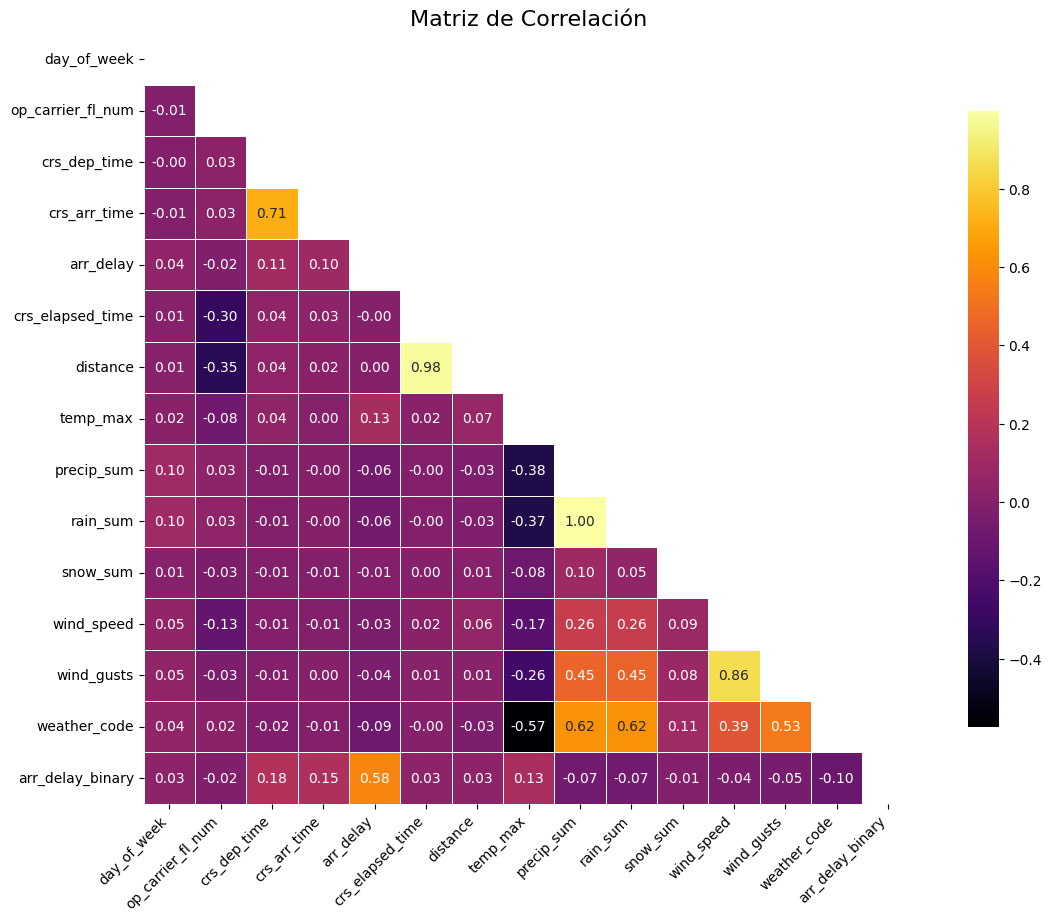

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Seleccionamos solo las variables numéricas
df_num = df_ml.select_dtypes(include=[np.number])

# 2. Calcular la matriz de correlación
corr = df_num.corr()

# 3. Crear una máscara para el triángulo superior (para ver "medio gráfico")
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4. Configurar y mostrar el gráfico con la paleta Inferno
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr,
    mask=mask,          # Aplica la máscara para ver solo la mitad
    annot=True,         # Muestra los números
    fmt=".2f",          # Dos decimales
    cmap='inferno',     # Paleta solicitada
    linewidths=0.5,     # Espacio entre celdas
    square=True,        # Celdas cuadradas
    cbar_kws={"shrink": .8}
)

plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
columnas_a_eliminar_2 = ['fl_date','precip_sum', 'crs_elapsed_time', 'wind_gusts', 'arr_delay']

# Eliminamos las columnas (axis=1 indica columnas)
df_ml_final = df_ml.drop(columns=columnas_a_eliminar_2)

# Verificamos que ya no estén
df_ml_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322069 entries, 0 to 1119567
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   day_of_week        322069 non-null  float64
 1   op_unique_carrier  322069 non-null  object 
 2   op_carrier_fl_num  322069 non-null  float64
 3   origin             322069 non-null  object 
 4   dest               322069 non-null  object 
 5   crs_dep_time       322069 non-null  float64
 6   crs_arr_time       322069 non-null  float64
 7   distance           322069 non-null  float64
 8   temp_max           322069 non-null  float64
 9   rain_sum           322069 non-null  float64
 10  snow_sum           322069 non-null  float64
 11  wind_speed         322069 non-null  float64
 12  weather_code       322069 non-null  float64
 13  arr_delay_binary   322069 non-null  int64  
dtypes: float64(10), int64(1), object(3)
memory usage: 36.9+ MB


In [24]:



cols_categoricas = ['origin', 'dest', 'op_unique_carrier']

for col in cols_categoricas:
    if col in df_ml_final.columns:
        df_ml_final[col] = df_ml_final[col].astype(str)
        print(f"Columna '{col}' convertida a objeto (texto).")

# 2. GENERAR DUMMIES
# drop_first=True: Evita la redundancia (Trampa de Dummies)
# dtype=int: Fuerza que sean 0 y 1 (y no True/False)
df_modelo_final = pd.get_dummies(df_ml_final, columns=cols_categoricas, drop_first=True, dtype=int)

# 3. LIMPIEZA FINAL
# Eliminamos la variable continua de minutos si aún existe,
# porque usaríamos 'arr_delay_binary' como objetivo.
if 'arr_delay' in df_modelo_final.columns:
    df_modelo_final = df_modelo_final.drop(columns=['arr_delay'])

# 4. VERIFICACIÓN
print("\n--- ¡Dummies Generados Exitosamente! ---")
print(f"Dimensiones originales: {df_ml.shape}")
print(f"Dimensiones finales: {df_modelo_final.shape}")
print(f"Total de variables listas para el modelo: {df_modelo_final.shape[1]}")

# Muestra las primeras filas para que veas los 0 y 1
df_modelo_final.head()

Columna 'origin' convertida a objeto (texto).
Columna 'dest' convertida a objeto (texto).
Columna 'op_unique_carrier' convertida a objeto (texto).

--- ¡Dummies Generados Exitosamente! ---
Dimensiones originales: (322069, 19)
Dimensiones finales: (322069, 346)
Total de variables listas para el modelo: 346


,day_of_week,op_carrier_fl_num,crs_dep_time,crs_arr_time,distance,temp_max,rain_sum,snow_sum,wind_speed,weather_code,...,op_unique_carrier_14,op_unique_carrier_15,op_unique_carrier_2,op_unique_carrier_3,op_unique_carrier_4,op_unique_carrier_5,op_unique_carrier_6,op_unique_carrier_7,op_unique_carrier_8,op_unique_carrier_9
0,0.5,4801.0,0.360153,0.480916,0.220577,0.370937,0.0,0.0,0.115479,0.04,...,0,0,0,0,0,0,0,0,0,0
2,0.5,4802.0,0.300128,0.402884,0.212480,0.370937,0.0,0.0,0.115479,0.04,...,0,0,0,0,0,0,0,0,0,0
3,0.5,4802.0,0.434653,0.599237,0.212480,0.447945,0.0,0.0,0.138293,0.04,...,0,0,0,0,0,0,0,0,0,0
4,0.5,4803.0,0.561516,0.678965,0.220577,0.370937,0.0,0.0,0.115479,0.04,...,0,0,0,0,0,0,0,0,0,0
8,0.5,4805.0,0.829715,0.952502,0.158373,0.370937,0.0,0.0,0.115479,0.04,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Separar X e y de tu dataframe con Dummies
X = df_modelo_final.drop(columns=['arr_delay_binary'])
y = df_modelo_final['arr_delay_binary']

print(f"Conteo Original: {y.value_counts().to_dict()}")

# 2. Aplicar SMOTE
# Esto creará vuelos retrasados "sintéticos" hasta igualar a los vuelos a tiempo
print("Aplicando SMOTE... ")
smote = SMOTE(random_state=108)
X_res, y_res = smote.fit_resample(X, y)

print(f"Conteo Balanceado (SMOTE): {y_res.value_counts().to_dict()}")

# 3. Guardar las variables listas para entrenar
# Es CRUCIAL volver a hacer el split con los datos nuevos
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_res, y_res, test_size=0.2, random_state=108
)

print("\n¡Todo listo! Tienes tus variables '_smote' preparadas.")

Conteo Original: {0: 254480, 1: 67589}
Aplicando SMOTE... 
Conteo Balanceado (SMOTE): {0: 254480, 1: 254480}

¡Todo listo! Tienes tus variables '_smote' preparadas.


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Configurar el Modelo
# Mantenemos los mismos parámetros para que la comparación sea justa
rf_smote = RandomForestClassifier(n_estimators=35, random_state=108, n_jobs=-1, max_depth=45)

print("Entrenando modelo balanceado...")

# 2. Entrenar con los datos "dopados" (SMOTE)
rf_smote.fit(X_train_smote, y_train_smote)

# 3. Predecir (Evaluamos en el test set reservado del balanceo)
y_pred_smote = rf_smote.predict(X_test_smote)

# 4. Resultados
print(classification_report(y_test_smote, y_pred_smote))

print("\n--- MATRIZ DE CONFUSIÓN ---")
print(confusion_matrix(y_test_smote, y_pred_smote))

Entrenando modelo balanceado...
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     51064
           1       0.87      0.86      0.86     50728

    accuracy                           0.86    101792
   macro avg       0.86      0.86      0.86    101792
weighted avg       0.86      0.86      0.86    101792


--- MATRIZ DE CONFUSIÓN ---
[[44349  6715]
 [ 7118 43610]]


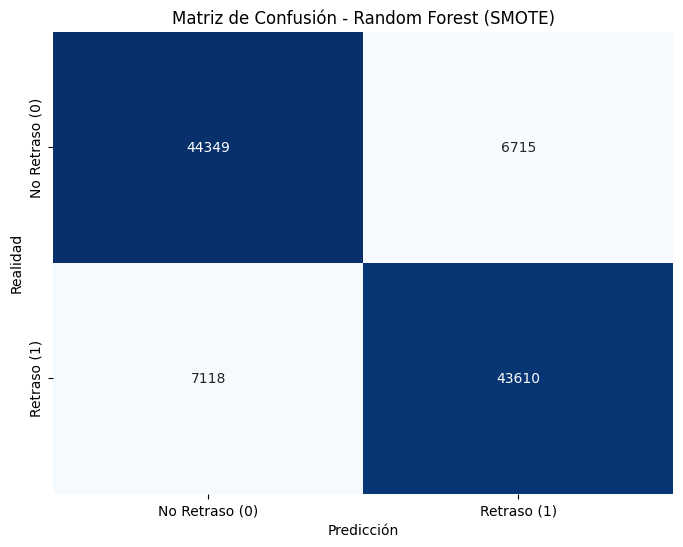

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generar la matriz
cm = confusion_matrix(y_test_smote, y_pred_smote)

# Graficar
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Retraso (0)', 'Retraso (1)'],
            yticklabels=['No Retraso (0)', 'Retraso (1)'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Random Forest (SMOTE)')
plt.show()

El umbral óptimo (por F1-Score) es: 0.505
Con este umbral, el Recall sería: 0.857


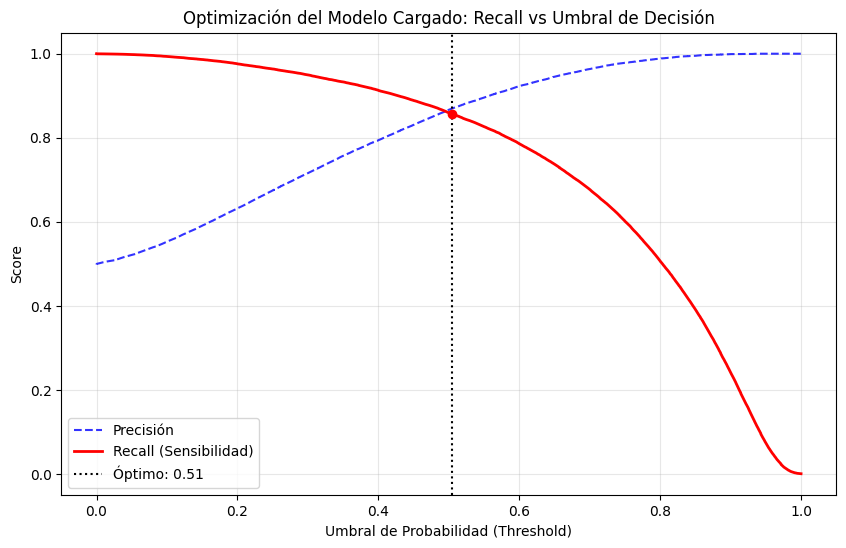

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# 1. Obtener las probabilidades de la Clase 1 (en lugar de la predicción 0/1 directa)
# Usamos X_test (o X_test_smote si estás evaluando sobre esa base)
y_probs = rf_smote.predict_proba(X_test_smote)[:, 1]

# 2. Calcular precisión y recall para todos los umbrales posibles
precisions, recalls, thresholds = precision_recall_curve(y_test_smote, y_probs)

# 3. Calcular el F1-Score para cada umbral para encontrar el "matemáticamente óptimo"
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_recall = recalls[best_idx]

print(f"El umbral óptimo (por F1-Score) es: {best_threshold:.3f}")
print(f"Con este umbral, el Recall sería: {best_recall:.3f}")

# 4. Graficar
plt.figure(figsize=(10, 6))

# Graficamos Recall y Precisión vs el Umbral
plt.plot(thresholds, precisions[:-1], 'b--', label='Precisión', alpha=0.8)
plt.plot(thresholds, recalls[:-1], 'r-', label='Recall (Sensibilidad)', linewidth=2)

# Marcar el punto óptimo
plt.axvline(best_threshold, color='black', linestyle=':', label=f'Óptimo: {best_threshold:.2f}')
plt.plot(best_threshold, best_recall, 'ro')

plt.title('Optimización del Modelo Cargado: Recall vs Umbral de Decisión')
plt.xlabel('Umbral de Probabilidad (Threshold)')
plt.ylabel('Score')
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)
plt.show()

Entrenando modelos para la curva de aprendizaje...


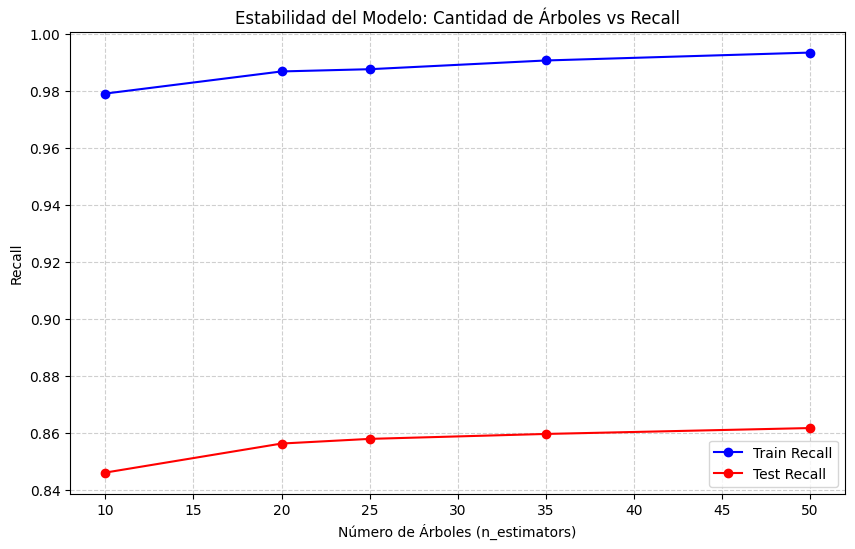

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# 1. Definir los rangos de árboles a probar
# Probamos valores saltados para ver la tendencia general sin tardar demasiado
n_arboles_list = [10, 20, 25, 35, 50]

recall_train = []
recall_test = []

# 2. Bucle de entrenamiento
print("Entrenando modelos para la curva de aprendizaje...")

for n in n_arboles_list:
    # Usamos los mismos parámetros que tu modelo original, variando solo n_estimators
    # Asegúrate de poner aquí tus otros hiperparámetros (max_depth, class_weight, etc.)
    rf_temp = RandomForestClassifier(
        n_estimators=n,
        random_state=108,  # Mantenemos la semilla para que sea comparable
        max_depth=45,
        n_jobs=-1          # Usa todos los núcleos para ir más rápido
    )

    rf_temp.fit(X_train_smote, y_train_smote) # O tus datos de train correspondientes

    # Guardamos el Recall (ajusta pos_label=1 si tu clase de interés es 1)
    recall_train.append(recall_score(y_train_smote, rf_temp.predict(X_train_smote)))
    recall_test.append(recall_score(y_test_smote, rf_temp.predict(X_test_smote)))

# 3. Graficar
plt.figure(figsize=(10, 6))
plt.plot(n_arboles_list, recall_train, color='blue', marker='o', label='Train Recall')
plt.plot(n_arboles_list, recall_test, color='red', marker='o', label='Test Recall')

plt.title('Estabilidad del Modelo: Cantidad de Árboles vs Recall')
plt.xlabel('Número de Árboles (n_estimators)')
plt.ylabel('Recall')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [30]:
import json
import pandas as pd

# 1. Generar el reporte en formato Diccionario (para que sea compatible con JSON)
report_dict = classification_report(y_test_smote, y_pred_smote, output_dict=True)

# 2. Preparar la Matriz de Confusión
# Las matrices de numpy no se pueden guardar directo en JSON, hay que pasarlas a lista
cm_list = confusion_matrix(y_test_smote, y_pred_smote).tolist()

# 3. Extraer Importancia de Variables (Top 20 para no saturar el JSON)
# Usamos las columnas de X (tu base con dummies) para ponerle nombre a los valores
feature_importance = pd.Series(
    rf_smote.feature_importances_,
    index=X.columns
).sort_values(ascending=False).head(20).to_dict()

# 4. Estructurar el JSON Final
datos_exportar = {
    "nombre_modelo": "Random Forest Classifier",
    "tecnica_balanceo": "SMOTE (50/50)",
    "parametros": {
        "n_estimators": 35,
        "random_state": 108,
        "max_depth": 45,
        "n_jobs": -1
    },
    "metricas_globales": {
        "accuracy": report_dict['accuracy'],
        "recall_clase_1_retraso": report_dict['1']['recall'],
        "precision_clase_1_retraso": report_dict['1']['precision']
    },
    "reporte_completo": report_dict,
    "matriz_confusion": cm_list,
    "top_variables_importantes": feature_importance
}

# 5. Guardar el archivo
nombre_archivo = 'resultados_modelo_v1.json'
with open(nombre_archivo, 'w') as f:
    json.dump(datos_exportar, f, indent=4) # indent=4 lo hace legible para humanos

print(f"¡Éxito! Archivo '{nombre_archivo}' generado.")

¡Éxito! Archivo 'resultados_modelo_v1.json' generado.


In [ ]:
# --- PASO 0: INSTALACIÓN AUTOMÁTICA (Corre esto primero) ---
# El signo '!' le dice a Colab que instale la librería en el sistema
!pip install skl2onnx

# --- PASO 1: IMPORTACIONES Y LÓGICA ---
import json
import pandas as pd
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Verificación de seguridad
if 'df_modelo_final' not in globals():
    raise ValueError("⚠️ ERROR: Por favor, corre primero el bloque donde creas 'df_modelo_final' (Dummies).")

print("1. Preparando datos...")
X = df_modelo_final.drop(columns=['arr_delay_binary'])
y = df_modelo_final['arr_delay_binary']

print("2. Aplicando SMOTE (Balanceo)...")
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("3. Entrenando modelo OPTIMIZADO (Para evitar crash de memoria)...")
# Usamos una versión ligera que sí cabe en la RAM al exportar
rf_final = RandomForestClassifier(
    n_estimators=35,    # Menos árboles (suficiente para patrones claros)
    max_depth=45,       # Profundidad limitada (CRUCIAL para exportar a Java sin errores)
    random_state=108,
    n_jobs=-1
)
rf_final.fit(X_res, y_res)

print("4. Generando archivo .onnx...")
# Definir entrada
num_features = X_res.shape[1]
initial_type = [('float_input', FloatTensorType([None, num_features]))]

# Convertir sin metadata pesada (zipmap=False ayuda a Java)
onx_model = convert_sklearn(
    rf_final,
    initial_types=initial_type,
    options={'zipmap': False}
)

# Guardar ONNX
nombre_onnx = "modelo_retrasos_light.onnx"
with open(nombre_onnx, "wb") as f:
    f.write(onx_model.SerializeToString())

print("5. Generando mapa de columnas...")
with open("orden_columnas.json", 'w') as f:
    json.dump(X.columns.tolist(), f)

# Descargar
print("¡ÉXITO! Descargando archivos para Java...")
files.download(nombre_onnx)
files.download("orden_columnas.json")

1. Preparando datos...
2. Aplicando SMOTE (Balanceo)...


In [ ]:
# --- PASO ÚNICO: INSTALACIÓN Y EXPORTACIÓN ---

# 1. Instalamos la librería necesaria (por si no está)
!pip install -q skl2onnx

import json
from google.colab import files
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# ---------------------------------------------------------
# CONFIGURACIÓN
# ---------------------------------------------------------
modelo_a_exportar = rf_smote  # Usamos el modelo que YA entrenaste en tu código anterior

# IMPORTANTE: Para el JSON necesitamos los nombres de las columnas originales.
# Si X_train_smote ya no es un DataFrame (SMOTE a veces lo vuelve array),
# usamos 'X' o 'X_train' (tus datos originales antes de SMOTE) para sacar los nombres.
try:
    # Intento 1: Si tienes X_train definido como DataFrame
    nombres_columnas = X_train.columns.tolist()
    num_features = len(nombres_columnas)
except NameError:
    # Intento 2: Si usaste X en tu bloque anterior
    nombres_columnas = X.columns.tolist()
    num_features = len(nombres_columnas)

print(f"Detectadas {num_features} variables para exportar.")

# ---------------------------------------------------------
# 1. CONVERSIÓN A ONNX
# ---------------------------------------------------------
print("Generando archivo .onnx...")

# Definimos el tipo de entrada (float)
initial_type = [('float_input', FloatTensorType([None, num_features]))]

# Convertimos (zipmap=False es vital para que Java lea la probabilidad limpia)
onx_model = convert_sklearn(
    modelo_a_exportar,
    initial_types=initial_type,
    options={'zipmap': False}
)

# Guardamos el binario
nombre_onnx = "modelo_retrasos_v2.onnx"
with open(nombre_onnx, "wb") as f:
    f.write(onx_model.SerializeToString())

# ---------------------------------------------------------
# 2. GENERACIÓN DEL MAPA DE COLUMNAS (JSON)
# ---------------------------------------------------------
print("Generando archivo .json...")
nombre_json = "orden_columnas_v2.json"
with open(nombre_json, 'w') as f:
    json.dump(nombres_columnas, f)

# ---------------------------------------------------------
# 3. DESCARGA AUTOMÁTICA
# ---------------------------------------------------------
print("¡Listo! Descargando archivos...")
files.download(nombre_onnx)
files.download(nombre_json)